In [1]:
# updated Nov 10, 2020

# load libraries

from __future__ import print_function
from scipy.spatial import ConvexHull
from skimage.transform import downscale_local_mean
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from skimage.measure import regionprops
import numpy as np
import matplotlib.pyplot as plt
import os as os
from tqdm import tqdm as tqdm_base
def tqdm(*args, **kwargs):
    if hasattr(tqdm_base, '_instances'):
        for instance in list(tqdm_base._instances):
            tqdm_base._decr_instances(instance)
    return tqdm_base(*args, **kwargs)
from scipy.io import loadmat
import numpy as np
import pandas as pd


# define functions

# function modified from here: https://github.com/weallen/STARmap/blob/master/python/analysis.py
def load_data(data_dir, prefix="Cell"):
        #expr = pd.read_csv(os.path.join(data_dir, "data_table.csv"), index_col=0)
    expr = pd.read_csv(os.path.join(data_dir, "cell_barcode_count.csv"), header=None)
    gene_names = pd.read_csv(os.path.join(data_dir, "cell_barcode_names.csv"),header=None)
    rownames = [i for i in range(expr.shape[0])]
    names = gene_names[2]
    names.name = "Gene"
    return pd.DataFrame(data=expr.values, columns=names, index=rownames)

# function modified from https://github.com/weallen/STARmap/blob/master/python/viz.py
def GetQHulls(labels):
    labels += 1
    Nlabels = labels.max()
    hulls = []
    coords = []
    num_cells = 0
    #cell_id = []
    #print('blah')
    for i in tqdm(range(Nlabels)):#enumerate(regionprops(labels)):
        #print(i,"/",Nlabels)
        curr_coords = np.argwhere(labels==i) # get all coordinates for a single cell label
        # size threshold of > 100 pixels and < 100000
        if curr_coords.shape[0] < 100000 and curr_coords.shape[0] > 1000: # if the cell shape is within threshold region, save the coordinates
            num_cells += 1
            hulls.append(ConvexHull(curr_coords))
            coords.append(curr_coords)
        #cell_id = np.append(cell_id, i)
    #print("Used %d / %d" % (num_cells, Nlabels))
    return hulls, coords

## my functions:
def normalize(counts):

    cts = np.array(counts)
    #index = np.array(np.where(np.sum(cts, axis = 1)!=0)).flatten()
    #cts = cts[index,:] # remove cells, where total library count is zero
    cts = cts + 0.001
    cell_sum = np.sum(cts, axis = 1) # get row-wise sum
    counts_out = cts/(np.tile(cell_sum, (cts.shape[1],1)).transpose()) # divide each column by row-wise sum

    return counts_out

def process_2D(data_dir, gene_names,i):

    # load data
    image = np.load(os.path.join(data_dir,'labels.npz'))["labels"]
    counts = load_data(data_dir, prefix="")

    # process counts
    normalized_counts = pd.DataFrame(normalize(counts)) # normalize counts
    normalized_counts.columns = counts.columns
    normalized_counts = normalized_counts.reindex(columns = sorted(gene_names))
    normalized_counts = np.array(normalized_counts.fillna(0))

    # get coords
    qhulls,coords = GetQHulls(image)# get all coordinates corresponding to single cell
    all_centroids  = np.vstack([np.append(c.mean(0),(0,i)) for c in coords]) # centroids are the average coordinates
    all_centroids_normalized = all_centroids/abs(all_centroids).max()
    #counts_and_coords = np.concatenate((normalized_counts, all_centroids.astype('int')[range(normalized_counts.shape[0]),:]), axis = 1) # concat counts and coords
    counts_and_coords = np.concatenate((normalized_counts, all_centroids_normalized.astype('int')), axis = 1) # concat counts and coords
    return counts_and_coords



In [37]:
image = np.load(os.path.join(data_dir,'labels.npz'))["labels"]
counts = load_data(data_dir, prefix="")

# process counts
normalized_counts = pd.DataFrame(normalize(counts)) # normalize counts
normalized_counts.columns = counts.columns
normalized_counts = normalized_counts.reindex(columns = sorted(all_genes))
normalized_counts = np.array(normalized_counts.fillna(0))


In [19]:
qhulls,coords = GetQHulls(image[12000:12349])# ge

100%|██████████| 1328/1328 [00:07<00:00, 184.79it/s]


In [25]:
all_centroids  = np.vstack([np.append(c.mean(0),(0,i)) for c in coords]) # centroids are the average coordinates
allll = all_centroids/abs(all_centroids).max()

In [29]:
allll[:,-1]=i

In [31]:
normalized_counts = normalized_counts[12000:12349,:]

In [39]:
np.concatenate((allll,allll),axis = 1)

array([[2.82999716e-03, 1.47944668e-01, 0.00000000e+00, 3.00000000e+00,
        2.82999716e-03, 1.47944668e-01, 0.00000000e+00, 3.00000000e+00],
       [8.56581308e-04, 3.11132536e-01, 0.00000000e+00, 3.00000000e+00,
        8.56581308e-04, 3.11132536e-01, 0.00000000e+00, 3.00000000e+00],
       [9.40448896e-03, 4.06010613e-01, 0.00000000e+00, 3.00000000e+00,
        9.40448896e-03, 4.06010613e-01, 0.00000000e+00, 3.00000000e+00],
       [5.84141531e-03, 2.81498171e-01, 0.00000000e+00, 3.00000000e+00,
        5.84141531e-03, 2.81498171e-01, 0.00000000e+00, 3.00000000e+00],
       [5.37771215e-03, 9.11646379e-01, 0.00000000e+00, 3.00000000e+00,
        5.37771215e-03, 9.11646379e-01, 0.00000000e+00, 3.00000000e+00],
       [8.41129232e-03, 1.49386359e-02, 0.00000000e+00, 3.00000000e+00,
        8.41129232e-03, 1.49386359e-02, 0.00000000e+00, 3.00000000e+00],
       [3.67383411e-03, 9.86526273e-01, 0.00000000e+00, 3.00000000e+00,
        3.67383411e-03, 9.86526273e-01, 0.00000000e+00, 3.

In [33]:
counts_and_coords = np.concatenate((normalized_counts, allll.astype('int')), axis = 1) # concat counts and coords


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [ ]:
image = np.load(os.path.join(data_dir,'labels.npz'))["labels"]
counts = load_data(data_dir, prefix="")

# process counts
normalized_counts = pd.DataFrame(normalize(counts)) # normalize counts
normalized_counts.columns = counts.columns
normalized_counts = normalized_counts.reindex(columns = sorted(gene_names))
normalized_counts = np.array(normalized_counts.fillna(0))

# get coords
qhulls,coords = GetQHulls(image[12000:12349])# get all coordinates corresponding to single cell
all_centroids  = np.vstack([np.append(c.mean(0),(0,i)) for c in coords]) # centroids are the average coordinates
all_centroids_normalized = all_centroids/abs(all_centroids).max()
#counts_and_coords = np.concatenate((normalized_counts, all_centroids.astype('int')[range(normalized_counts.shape[0]),:]), axis = 1) # concat counts and coords
counts_and_coords = np.concatenate((normalized_counts, all_centroids_normalized.astype('int')), axis = 1) # concat counts and coords
return counts_and_coords



In [2]:
#  get union of all gene names (across 3D and 2D datasets)
genenames_3D = pd.read_csv('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/sequentially_encoded_Wang_et_al_2018/gene_names.csv', header = 0)

dirs = os.listdir('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/combinatorially_encoded/all_datasets')

ct = []
for i in range(len(dirs)):

    data_dir1 = os.path.join('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/combinatorially_encoded/all_datasets',dirs[i])
    ct.append(load_data(data_dir1, prefix=""))

genenames = []
for i in range(len(dirs)):
    genenames.append(ct[i].columns)
all_genes = np.unique(np.concatenate((np.unique(np.concatenate(genenames)),(np.array(genenames_3D).flatten()))))

# process and append all the 2D datasets to one another



In [5]:
data_out = []
for i in range(2,4):
    data_dir = os.path.join('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/combinatorially_encoded/all_datasets',dirs[i])
    data_out.append(process_2D(data_dir, all_genes,i))



100%|██████████| 1328/1328 [04:28<00:00,  4.95it/s]


In [9]:
pd.DataFrame(np.concatenate(data_out))

,0,1,2,3,4,5,6,7,8,9,...,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033
0,4.738887e-06,4.738887e-06,4.738887e-06,4.738887e-06,4.738887e-06,0.004744,4.738887e-06,4.738887e-06,4.738887e-06,4.738887e-06,...,4.743626e-03,4.738887e-06,4.738887e-06,4.738887e-06,4.738887e-06,0.000005,0.0,0.0,0.0,0.0
1,1.172104e-03,1.170933e-06,2.343036e-03,1.170933e-06,1.170933e-06,0.002343,1.170933e-06,1.172104e-03,1.170933e-06,1.170933e-06,...,1.172104e-03,1.172104e-03,1.170933e-06,1.170933e-06,1.170933e-06,0.001172,0.0,0.0,0.0,0.0
2,6.621640e-06,6.621640e-06,6.621640e-06,6.621640e-06,6.621640e-06,0.000007,6.621640e-06,6.628261e-03,6.621640e-06,6.621640e-06,...,6.621640e-06,6.621640e-06,6.621640e-06,6.621640e-06,6.621640e-06,0.000007,0.0,0.0,0.0,0.0
3,4.052303e-03,4.048255e-06,4.048255e-06,4.048255e-06,4.048255e-06,0.000004,4.048255e-06,4.048255e-06,4.048255e-06,4.048255e-06,...,4.048255e-06,4.048255e-06,4.048255e-06,4.048255e-06,4.048255e-06,0.000004,0.0,0.0,0.0,0.0
4,2.673654e-06,5.349981e-03,2.676327e-03,2.673654e-06,2.673654e-06,0.005350,2.673654e-06,2.676327e-03,2.673654e-06,2.673654e-06,...,2.673654e-06,2.673654e-06,2.673654e-06,2.673654e-06,2.673654e-06,0.000003,0.0,0.0,0.0,0.0
5,2.976013e-06,2.978989e-03,2.976013e-06,2.978989e-03,2.976013e-06,0.000003,2.976013e-06,2.976013e-06,2.976013e-06,2.976013e-06,...,2.976013e-06,2.976013e-06,2.978989e-03,2.976013e-06,2.976013e-06,0.000003,0.0,0.0,0.0,0.0
6,2.096348e-06,2.096348e-06,2.096348e-06,2.096348e-06,2.096348e-06,0.000002,2.096348e-06,2.096348e-06,2.098445e-03,2.096348e-06,...,2.096348e-06,2.096348e-06,2.096348e-06,2.096348e-06,2.096348e-06,0.000002,0.0,0.0,0.0,0.0
7,3.174402e-06,6.351978e-03,3.174402e-06,3.174402e-06,3.174402e-06,0.000003,3.174402e-06,3.174402e-06,3.174402e-06,3.174402e-06,...,6.351978e-03,3.174402e-06,3.177576e-03,3.174402e-06,3.174402e-06,0.000003,0.0,0.0,0.0,0.0
8,3.622926e-06,3.622926e-06,3.622926e-06,3.622926e-06,3.622926e-06,0.000004,3.622926e-06,3.622926e-06,3.622926e-06,3.622926e-06,...,3.622926e-06,3.622926e-06,3.622926e-06,3.622926e-06,3.622926e-06,0.000004,0.0,0.0,0.0,0.0
9,8.263097e-06,8.263097e-06,8.263097e-06,8.263097e-06,8.263097e-06,0.000008,8.263097e-06,8.263097e-06,8.271360e-03,8.263097e-06,...,8.263097e-06,8.263097e-06,8.263097e-06,8.263097e-06,8.263097e-06,0.000008,0.0,0.0,0.0,0.0


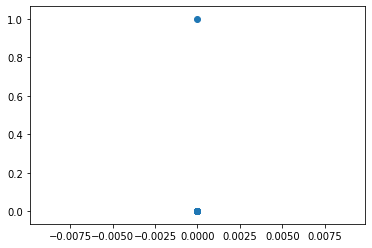

In [10]:
plt.scatter(data_out[0][:,1030],data_out[0][:,1031])

In [ ]:
# process the 3D datasets 

counts_3d = loadmat('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/sequentially_encoded_Wang_et_al_2018/20180123_BS10_light.mat')
counts_3d_normalized = normalize(counts_3d['expr'])
counts_3d_normalized = pd.DataFrame(counts_3d_normalized)
counts_3d_normalized.columns =  np.array(genenames_3D[['gene']]).flatten()
reindexed_3d = counts_3d_normalized.reindex(columns = (all_genes))
reindexed_3d = np.array(reindexed_3d.fillna(0))
coordinates_3d = np.matrix(counts_3d['goodLocs'])
coordinates_3d_normalized = coordinates_3d/abs(coordinates_3d).max()
complete_3d = np.concatenate((reindexed_3d, coordinates_3d_normalized), axis = 1)
complete_3d = np.concatenate((complete_3d,np.repeat(33, complete_3d.shape[0]).reshape(complete_3d.shape[0],1)),axis=1)

# concatenate all data
all_data = np.concatenate((np.concatenate(data_out), complete_3d))

# save data out
np.savez('Wang_2018_all_2D_3D_processed.npz',all_data)
